In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pingouin as pg
sns.set_style("whitegrid")

In [2]:
df = pd.DataFrame(data={
    "col1":[18.3, 13.3, 16.5, 12.6, 9.5, 13.6, 8.1, 8.9, 10, 8.3, 7.9, 8.1, 13.4],
    "col2":[12.7, 11.1, 15.3, 12.7, 10.5, 15.6, 11.2, 14.2, 16.3, 15.5, 19.9, 20.4, 36.8]
})
df

,col1,col2
0,18.3,12.7
1,13.3,11.1
2,16.5,15.3
3,12.6,12.7
4,9.5,10.5
5,13.6,15.6
6,8.1,11.2
7,8.9,14.2
8,10.0,16.3
9,8.3,15.5


there is no statistical normality in how the values are distributed

In [4]:
pg.normality(data=df, alpha=0.05)

,W,pval,normal
col1,0.879760,0.070778,True
col2,0.722989,0.000952,False


we do not have enough evidence to accept th null hypothesis for col1, we reject for col 1, and for col2, we accept the null hypothesis

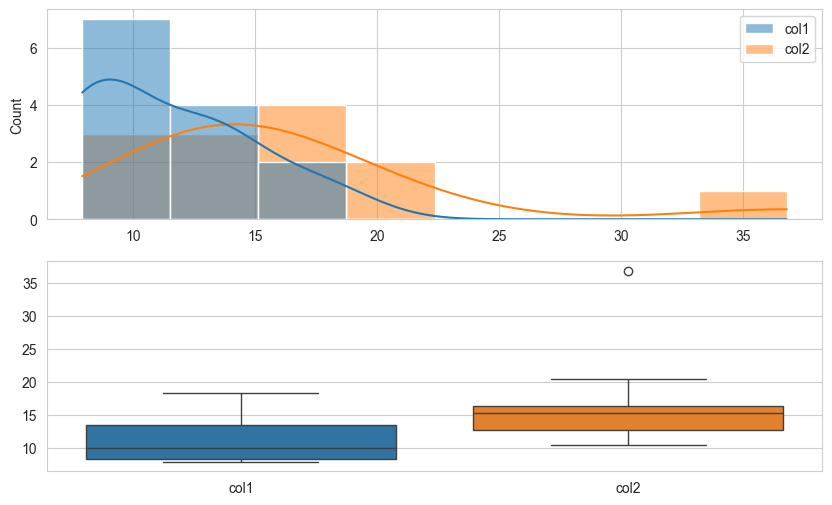

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,6))
sns.histplot(data=df, kde=True, ax=axes[0])
sns.boxplot(data=df, ax=axes[1])
plt.show()

Any difference between col1 and col2 is purely random chance and there is no statistically significant difference

In [9]:
pg.wilcoxon(x=df["col1"], y=df["col2"])

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,16.0,two-sided,0.039795,-0.648352,0.224852


as the p-val is lesser than that of 0.05, we reject the null hypotheise - there is indeed a statistical difference between col1 and col2

GitHub Copilot
You’re close, Naren, but let’s clarify:

The p-value is not the probability that the null hypothesis is true.
The p-value is the probability of observing your data (or something more extreme) if the null hypothesis were true.
So, if p < 0.05:

There is less than a 5% chance of seeing your data (or more extreme) if the null hypothesis is true.
This means your data is unlikely under the null hypothesis, so you reject the null hypothesis.
In your example:

A low p-value means it’s unlikely that the observed difference between col1 and col2 happened by random chance (if there were really no difference).
So, you reject the null hypothesis and conclude there is a statistically significant difference.
Summary:

p-value < 0.05: Data is unlikely under the null hypothesis → reject the null.
The p-value is not the probability that the null is true, but the probability of your data given the null is true.
